### Message 测试

In [1]:
from app.schema import Message


In [2]:
user_msg = Message.user_message("Hello, how can I assist you today?")
print(user_msg.to_dict())

{'role': 'user', 'content': 'Hello, how can I assist you today?'}


In [3]:
system_msg = Message.system_message("System is now online.")
print(system_msg.to_dict())

{'role': 'system', 'content': 'System is now online.'}


In [4]:
assistant_reply = Message.assistant_message("I'm here to help you!")
print(assistant_reply.to_dict())

{'role': 'assistant', 'content': "I'm here to help you!"}


In [5]:
tool_call_msg = Message.tool_message(content="Calling weather API.", name="weather", tool_call_id="call_001")
print(tool_call_msg.to_dict())

{'role': 'tool', 'content': 'Calling weather API.', 'name': 'weather', 'tool_call_id': 'call_001'}


In [6]:
msg1 = Message.user_message("First message.")
msg2 = Message.assistant_message("Second message.")

# 使用 + 操作符组合消息
combined_msgs = msg1 + msg2
print([msg.to_dict() for msg in combined_msgs])

[{'role': 'user', 'content': 'First message.'}, {'role': 'assistant', 'content': 'Second message.'}]


In [7]:
# 或者与列表组合
msgs_list = [msg1]
combined_with_list = msgs_list + msg2
print([msg.to_dict() for msg in combined_with_list])

[{'role': 'user', 'content': 'First message.'}, {'role': 'assistant', 'content': 'Second message.'}]


In [8]:
image_msg = Message.user_message_with_image(
    text="Please analyze this image",
    image_url="https://example.com/sample.jpg",
    detail="high"  
)
print(image_msg.to_dict())

{'role': 'user', 'content': [{'type': 'text', 'text': 'Please analyze this image'}, {'type': 'image_url', 'image_url': {'url': 'https://example.com/sample.jpg', 'detail': 'high'}}]}


In [9]:
# 创建复杂多媒体消息
custom_msg = Message.user_multimedia_message([
    {"type": "text", "text": "description"},
    {
        "type": "image_url",
        "image_url": {
            "url": "https://example.com/image1.jpg",
            "detail": "low"
        }
    },
    {
        "type": "image_url",
        "image_url": {
            "url": "https://example.com/image2.jpg"
        }
    }
])
print(custom_msg.to_dict())

{'role': 'user', 'content': [{'type': 'text', 'text': 'description'}, {'type': 'image_url', 'image_url': {'url': 'https://example.com/image1.jpg', 'detail': 'low'}}, {'type': 'image_url', 'image_url': {'url': 'https://example.com/image2.jpg'}}]}


In [10]:

combined_img_list = image_msg + custom_msg
print([msg.to_dict() for msg in combined_img_list])

[{'role': 'user', 'content': [{'type': 'text', 'text': 'Please analyze this image'}, {'type': 'image_url', 'image_url': {'url': 'https://example.com/sample.jpg', 'detail': 'high'}}]}, {'role': 'user', 'content': [{'type': 'text', 'text': 'description'}, {'type': 'image_url', 'image_url': {'url': 'https://example.com/image1.jpg', 'detail': 'low'}}, {'type': 'image_url', 'image_url': {'url': 'https://example.com/image2.jpg'}}]}]


{'role': 'user', 'content': [{'type': 'text', 'text': 'Please analyze this image'}, {'type': 'image_url', 'image_url': {'url': '', 'detail': 'auto'}}]}

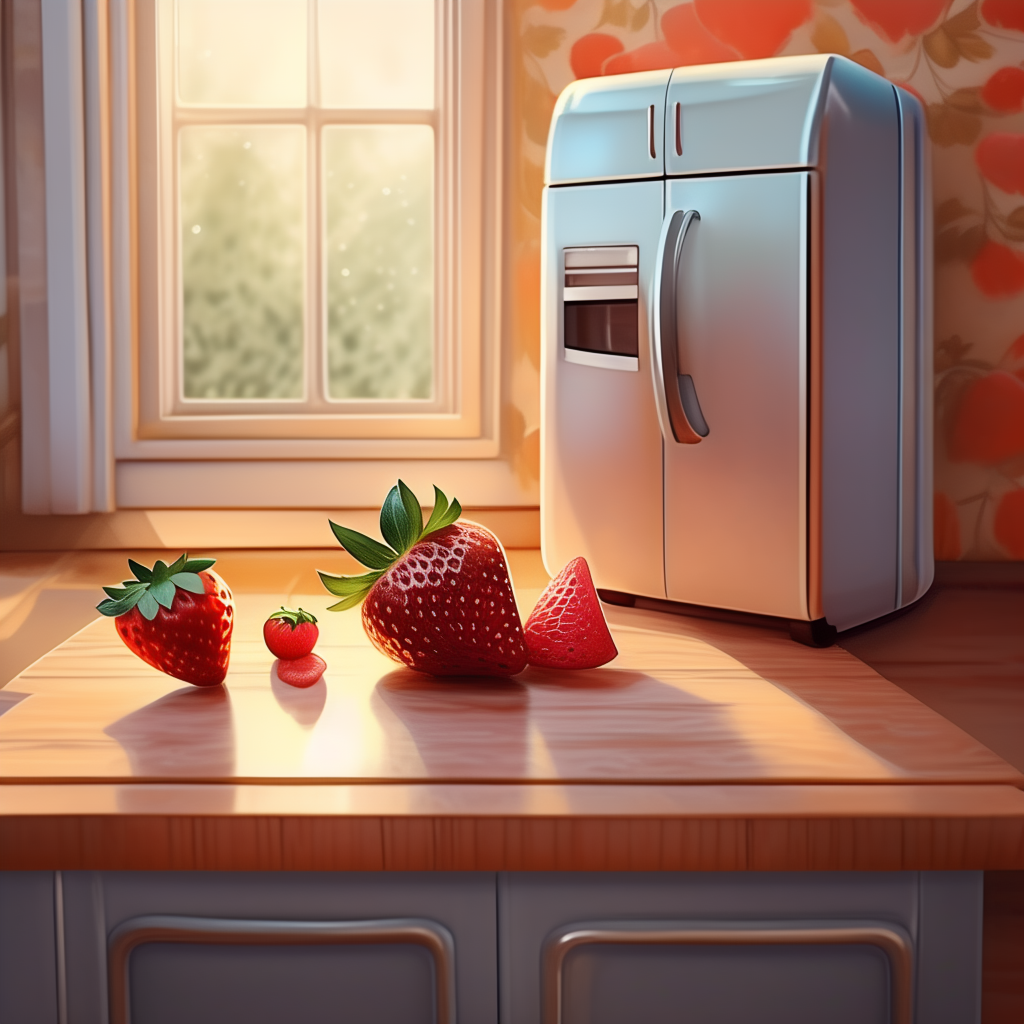

In [11]:
from app.schema import Message
msg1 = Message.user_message_with_local_image(
    text="Please analyze this image",
    image_path="img/test.png",
    mime_type="image/png"
)
print(msg1.to_dict())

`Field` 的作用

在 Pydantic 模型中，`Field` 用于定义模型属性的元数据。它允许你指定默认值、验证器、描述信息等。在你的 `Message` 类中，`Field` 被用来为属性设置默认值或标记它们为必需项。例如：

- `role: ROLE_TYPE = Field(...)`：这里的 `...` 表示该字段是必需的，没有默认值。
- `content: Optional[str] = Field(default=None)`：为 `content` 字段提供了一个默认值 `None`。

使用 `Field` 可以增强模型的灵活性和表达力，使得模型不仅能够存储数据，还能对数据进行有效的验证和约束。

 `__add__` 和 `__radd__` 的区别

这两个方法都是 Python 特殊方法（也称为魔术方法），用于实现对象之间的加法操作。

- `__add__(self, other)`：当你的对象位于加号的左侧时调用。例如，在表达式 `a + b` 中，如果 `a` 是一个 `Message` 对象，则会调用 `a.__add__(b)`。
- `__radd__(self, other)`：当对象位于加号的右侧且左侧的对象不支持与之相加时调用。比如，在 `b + a` 中，如果 `b` 不知道如何处理与 `a` 的加法操作，则会尝试调用 `a.__radd__(b)`。

在你的例子中，`__add__` 和 `__radd__` 方法允许 `Message` 对象与其他 `Message` 对象或列表进行“加法”操作，实际上是将这些消息合并到一个列表中返回。

`List["Message"]` 的含义

`List["Message"]` 使用了 Python 的类型提示语法，表明这是一个包含 `Message` 类型对象的列表。这是 Python 3.5 引入的特性，旨在提高代码的可读性和开发工具的支持能力（如静态类型检查）。具体来说：

- `List` 是 typing 模块中的一个泛型类型，表示列表类型。
- `"Message"` 在这里是对类名的引用，双引号是为了避免在类定义完成前引用自身而导致错误。在 Python 3.7及以上版本，可以直接写成 `List[Message]` 而不需要引号。

因此，`List["Message"]` 明确指出函数或方法返回的是一个由 `Message` 对象组成的列表，这有助于开发者和其他阅读代码的人更好地理解代码意图，并帮助静态分析工具更准确地检查代码。

## Memory

In [12]:
from app.schema import Memory
memory = Memory()

In [13]:
assistant_reply1 = Message.assistant_message("I'm here to help!")
assistant_reply2 = Message.assistant_message("What do you need assistance with?")
memory.add_messages([assistant_reply1, assistant_reply2])
print(f"Messages in memory after adding multiple: {len(memory.messages)}")

Messages in memory after adding multiple: 2


In [14]:
recent_msgs = memory.get_recent_messages(2)
for msg in recent_msgs:
    print(msg.to_dict())

{'role': 'assistant', 'content': "I'm here to help!"}
{'role': 'assistant', 'content': 'What do you need assistance with?'}


In [15]:
dict_list = memory.to_dict_list()
print(dict_list)

[{'role': 'assistant', 'content': "I'm here to help!"}, {'role': 'assistant', 'content': 'What do you need assistance with?'}]


## LLM

In [16]:
from app.llm import LLM

这段代码定义了一个名为 `LLM` 的类，旨在通过配置名称实现单例模式（Singleton Pattern），并且提供了一些初始化逻辑。下面是对其中提到的关键概念的解释：

`__new__` 方法

`__new__` 是一个静态方法，它在对象实例化时被调用，先于 `__init__` 方法执行。它的主要作用是创建类的实例并返回该实例。在这个例子中，`__new__` 方法用于确保对于每个 `config_name` 只有一个 `LLM` 实例存在（即单例模式）。如果给定的 `config_name` 还没有对应的实例，则创建一个新的实例，并将其存储在 `_instances` 字典中；如果已经存在，则直接返回已有的实例。

 `__init__` 方法和 `hasattr`

`__init__` 方法通常用于初始化新创建的对象的状态。然而，在这个例子中，由于使用了 `__new__` 方法手动调用了 `__init__`，我们需要确保不会重复初始化同一个实例。因此，使用了 `hasattr(self, "client")` 来检查实例是否已经被初始化过（即检查是否存在名为 `client` 的属性）。如果不存在，则进行初始化操作。

 `_instance` 和 `Dict[str, "LLM"]`

- `_instances`: 这是一个类变量，类型为字典，用于存储不同配置名下的 `LLM` 单例实例。键是配置名称（`str` 类型），值是对应的 `LLM` 实例。使用这种方式可以确保每个配置名只对应一个 `LLM` 实例。
- `Dict[str, "LLM"]`: 这是 Python 的类型提示语法，表示 `_instances` 是一个字典，其键是字符串类型，值是 `LLM` 类型的实例。这里的 `"LLM"` 使用引号包裹是因为在类定义内部直接引用自身类型需要这样做（在 Python 3.7及以上版本中可以直接写成 `LLM` 而不需要引号）。

 总结

- `__new__` 方法用于控制对象的创建过程，并实现了基于配置名的单例模式。
- `__init__` 方法中的 `hasattr` 检查是为了避免对同一个实例多次初始化。
- `_instances` 字典用于保存每个配置名对应的唯一 `LLM` 实例，而 `Dict[str, "LLM"]` 则是对 `_instances` 类型的明确声明，增强了代码的可读性和类型安全性。

这段代码展示了如何利用 Python 的特殊方法来实现设计模式以及如何使用类型注解来提高代码质量。

## PlanningTool

In [17]:
from app.tool.planning import PlanningTool
from app.tool.action_planning import ActionPlanningTool
planning_tool = PlanningTool()
action_planing_tool = ActionPlanningTool()

In [18]:
result = await planning_tool.execute(
    command="create",
    plan_id="plan_001",
    title="My First Plan",
    steps=["Step 1: Define goals", "Step 2: Research", "Step 3: Draft proposal"]
)
print(result.output)


Plan created successfully with ID: plan_001

Plan: My First Plan (ID: plan_001)

Progress: 0/3 steps completed (0.0%)
Status: 0 completed, 0 in progress, 0 blocked, 3 not started

Steps:
0. [ ] Step 1: Define goals
1. [ ] Step 2: Research
2. [ ] Step 3: Draft proposal



In [19]:
result = await action_planing_tool.execute(
    command="create",
    plan_id="plan_001",
    title="My First Plan",
    steps=["Step 1: Define goals", "Step 2: Research", "Step 3: Draft proposal"]
)
print(result.output)


Action plan created successfully with ID: plan_001

Plan: My First Plan (ID: plan_001)

Progress: 0/3 steps completed (0.0%)
Status: 0 completed, 0 in progress, 0 blocked, 3 not started

Steps:
0. [ ] Step 1: Define goals
1. [ ] Step 2: Research
2. [ ] Step 3: Draft proposal



In [44]:
result = await action_planing_tool.execute(
    plan_id="plan_002",
    title="My First Plan",
    steps=[1,2,3]
)
print(result.output)


Action plan created successfully with ID: plan_002

Plan: My First Plan (ID: plan_002)

Progress: 0/3 steps completed (0.0%)
Status: 0 completed, 0 in progress, 0 blocked, 3 not started

Steps:
0. [ ] Grasp a Lego block and put it in the bin.
1. [ ] Open the fridge door.
2. [ ] Pick up the mop and lean it against the wall.



In [20]:
result = await planning_tool.execute(
    command="update",
    plan_id="plan_001",
    title="Updated Title",
    steps=["Step 1: Define clear goals", "Step 2: Conduct thorough research", "Step 3: Write detailed proposal", "Step 4: Review"]
)
print(result.output)

Plan updated successfully: plan_001

Plan: Updated Title (ID: plan_001)

Progress: 0/4 steps completed (0.0%)
Status: 0 completed, 0 in progress, 0 blocked, 4 not started

Steps:
0. [ ] Step 1: Define clear goals
1. [ ] Step 2: Conduct thorough research
2. [ ] Step 3: Write detailed proposal
3. [ ] Step 4: Review



In [21]:
result = await planning_tool.execute(command="list")
print(result.output)


Available plans:
• plan_001 (active): Updated Title - 0/4 steps completed



In [22]:
result = await planning_tool.execute(command="get", plan_id="plan_001")
print(result.output)

Plan: Updated Title (ID: plan_001)

Progress: 0/4 steps completed (0.0%)
Status: 0 completed, 0 in progress, 0 blocked, 4 not started

Steps:
0. [ ] Step 1: Define clear goals
1. [ ] Step 2: Conduct thorough research
2. [ ] Step 3: Write detailed proposal
3. [ ] Step 4: Review



In [23]:
result = await planning_tool.execute(command="set_active", plan_id="plan_001")
print(result.output)

Plan 'plan_001' is now the active plan.

Plan: Updated Title (ID: plan_001)

Progress: 0/4 steps completed (0.0%)
Status: 0 completed, 0 in progress, 0 blocked, 4 not started

Steps:
0. [ ] Step 1: Define clear goals
1. [ ] Step 2: Conduct thorough research
2. [ ] Step 3: Write detailed proposal
3. [ ] Step 4: Review



In [24]:
result = await planning_tool.execute(
    command="mark_step",
    step_index=0,
    step_status="completed",
    step_notes="Completed initial goal setting."
)
print(result.output)

Step 0 updated in plan 'plan_001'.

Plan: Updated Title (ID: plan_001)

Progress: 1/4 steps completed (25.0%)
Status: 1 completed, 0 in progress, 0 blocked, 3 not started

Steps:
0. [✓] Step 1: Define clear goals
   Notes: Completed initial goal setting.
1. [ ] Step 2: Conduct thorough research
2. [ ] Step 3: Write detailed proposal
3. [ ] Step 4: Review



In [25]:
result = await planning_tool.execute(command="delete", plan_id="plan_001")
print(result.output)

Plan 'plan_001' has been deleted.


## 让大语言模型挑选工具并给出参数

In [26]:
from openai import AsyncOpenAI   
model = "qwen-plus"     # The LLM model to use
base_url = "https://dashscope.aliyuncs.com/compatible-mode/v1"    # API endpoint URL
api_key = "sk-894e4555026b4c57b95aa35792ba5e90"
client= AsyncOpenAI(api_key=api_key, base_url=base_url)

In [27]:
from app.tool.base import BaseTool  

_GET_CURRENT_WEATHER_DESCRIPTION = """
Get the current weather information for a specified location.
The tool provides functionality to query weather data based on city and country.
"""

class GetCurrentWeather(BaseTool):
    """
    Get the current weather information for a specified location.
    The tool provides functionality to query weather data based on city and country.
    """

    name: str = "get_current_weather"
    description: str = _GET_CURRENT_WEATHER_DESCRIPTION
    parameters: dict = {
        "type": "object",
        "properties": {
            "location": {
                "description": "The city and country, e.g. San Francisco, CA",
                "type": "string",
                "required": True,
            },
        },
        "required": ["location"],
        "additionalProperties": False,
    }

    async def execute(self, **kwargs):
        location = kwargs.get('location', '')
        if not location:
            return "Location is required."
        
        response = f"The current weather in {location} is sunny with a temperature of 20°C."
        
        return response

In [28]:
from app.prompt.lerobot import ACTIONBASE

STEP_DESCRIPTION = f"""  

{ACTIONBASE}  
**Planning Requirements:**  
- Build plans by chaining 2-5 Action Base steps.  
- Ensure physical continuity (e.g. must open door before retrieving items).  
- Verify step feasibility (e.g. required object availability).  
- Prioritize efficient sequences (minimum necessary actions).  
- Strictly use ONLY the 20 defined actions. 
- If the task is not described in English, translate it into English first
- If the task cannot be completed using actions from the Action Base, return 'I cannot complete this task.'  
"""  

_PLANNING_TOOL_DESCRIPTION = """
A planning tool that allows the agent to create and manage plans for solving complex tasks.
The tool provides functionality for creating plans, updating plan steps, and tracking progress.
"""


class MyPlanningTool(BaseTool):
    """
    A planning tool that allows the agent to create and manage plans for solving complex tasks.
    The tool provides functionality for creating plans, updating plan steps, and tracking progress.
    """

    name: str = "planning"
    description: str = _PLANNING_TOOL_DESCRIPTION
    parameters: dict = {
        "type": "object",
        "properties": {
            "command": {
                "description": "The command to execute. Available commands: create, update, list, get, set_active, mark_step, delete.",
                "enum": [
                    "create",
                    "update",
                    "list",
                    "get",
                    "set_active",
                    "mark_step",
                    "delete",
                ],
                "type": "string",
            },
            "plan_id": {
                "description": "Unique identifier for the plan. Required for create, update, set_active, and delete commands. Optional for get and mark_step (uses active plan if not specified).",
                "type": "string",
            },
            "title": {
                "description": "Title for the plan. Required for create command, optional for update command.",
                "type": "string",
            },
            "steps": {
                "description": f"List of plan steps. Required for create command, optional for update command.{STEP_DESCRIPTION}",
                "type": "array",
                "items": {"type": "string"},
            },
            "step_index": {
                "description": "Index of the step to update (0-based). Required for mark_step command.",
                "type": "integer",
            },
            "step_status": {
                "description": "Status to set for a step. Used with mark_step command.",
                "enum": ["not_started", "in_progress", "completed", "blocked"],
                "type": "string",
            },
            "step_notes": {
                "description": "Additional notes for a step. Optional for mark_step command.",
                "type": "string",
            },
        },
        "required": ["command"],
        "additionalProperties": False,
    }

    async def execute(self,**kwargs,):
        print("hello")

In [29]:
from dataclasses import dataclass, field
from typing import List, Optional

@dataclass
class Function:
    name: str
    arguments: str

@dataclass
class ChatCompletionMessageToolCall:
    id: str
    function: Function
    type: str
    index: int

@dataclass
class ChatCompletionMessage:
    content: str
    role: str
    tool_calls: List[ChatCompletionMessageToolCall] = field(default_factory=list)

@dataclass
class Choice:
    finish_reason: str
    index: int
    message: ChatCompletionMessage

@dataclass
class CompletionUsage:
    completion_tokens: int
    prompt_tokens: int
    total_tokens: int

@dataclass
class ChatCompletion:
    id: str
    created: int
    model: str
    choices: List[Choice]
    usage: CompletionUsage

def format_chat_completion(completion: ChatCompletion) -> str:
    formatted_output = [
        "Chat Completion Details:",
        "------------------------",
        f"ID: {completion.id}",
        f"Created At: {(lambda ts: f'{ts//31536000} years, {(ts%31536000)//86400} days, {(ts%86400)//3600} hours, {(ts%3600)//60} minutes, {ts%60} seconds')((2025*31536000 + 79*86400 + 15*3600 + 21*60 + 49) - (1970*31536000))} (timestamp {completion.created})",
        f"Model Used: {completion.model}\n",
        
        "Choices:",
        "========",
    ]
    
    for idx, choice in enumerate(completion.choices, start=1):
        formatted_output.append(f"{idx}. Choice:")
        formatted_output.append(f"   - Finish Reason: {choice.finish_reason}")
        formatted_output.append(f"   - Index: {choice.index}")
        formatted_output.append("   - Message:")
        formatted_output.append(f"     * Role: {choice.message.role}")
        formatted_output.append(f"     * Content: {choice.message.content}")
        if choice.message.tool_calls:
            for tool_call in choice.message.tool_calls:
                formatted_output.append("     * Tool Calls:")
                formatted_output.append(f"       - Tool Call ID: {tool_call.id}")
                formatted_output.append(f"       - Function Name: {tool_call.function.name}")
                formatted_output.append(f"       - Arguments: {tool_call.function.arguments}")
                formatted_output.append(f"       - Type: {tool_call.type}")
                formatted_output.append(f"       - Index: {tool_call.index}")
    
    formatted_output.extend([
        "\nUsage Statistics:",
        "=================",
        f"- Prompt Tokens: {completion.usage.prompt_tokens}",
        f"- Completion Tokens: {completion.usage.completion_tokens}",
        f"- Total Tokens: {completion.usage.total_tokens}",
    ])
    
    return "\n".join(formatted_output)


In [30]:
import asyncio  
import nest_asyncio  
nest_asyncio.apply()



async def make_completion_request(model, client,tool):  
    tools = [tool.to_param()]
    
    messages = [  
        {"role": "user", "content": "What's the weather like in Harbin?"},  
        {"role": "assistant", "content": "Let me check that for you."},  
    ]  
    
    params = {  
        "model": model,  
        "messages": messages,  
        "tools": tools,  
        "tool_choice": "auto",   
        "timeout": 30,  
    }  

    response = await client.chat.completions.create(**params) 
    print(response) 
    print(format_chat_completion(response))  
    return response.choices[0].message

tool = GetCurrentWeather()
response = asyncio.run(make_completion_request(model, client, tool))  

ChatCompletion(id='chatcmpl-bf22b7c5-f994-9471-8709-9e1bde37b8b8', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_a74ddef71e3e42b1aa05e1', function=Function(arguments='{"location": "Harbin, CN"}', name='get_current_weather'), type='function', index=0)]))], created=1743002639, model='qwen-plus', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=22, prompt_tokens=225, total_tokens=247, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))
Chat Completion Details:
------------------------
ID: chatcmpl-bf22b7c5-f994-9471-8709-9e1bde37b8b8
Created At: 55 years, 79 days, 15 hours, 21 minutes, 49 seconds (timestamp 1743002639)
Model Used: qwen-plus

Choices:
1. Choice:
   - Finish Reason: tool_calls
  

In [31]:
import asyncio  
import nest_asyncio  
from app.tool.robot_action import RobotAction
nest_asyncio.apply()

system_msg = "You are a planning assistant. Create a concise, actionable plan with clear steps. " \
            +  "Focus on key milestones rather than detailed sub-steps. " \
            +  "Optimize for clarity and efficiency."

request = "Help me put the strawberries in the fridge"


user_msg = Message.user_message_with_local_image(
    text=f"Create a reasonable plan with clear steps to accomplish the task: {request}",
    image_path="img/test.png",
    mime_type="image/png"
).to_dict()

async def make_completion_request(model, client,tool):  
    tools = [tool.to_param()]
    
    messages = [  
        {"role" : "system", "content": system_msg},
        user_msg 
    ]  
    
    params = {  
        "model": model,  
        "messages": messages,  
        "tools": tools,  
        "tool_choice": "auto",   
        "timeout": 30,  
    }  

    response = await client.chat.completions.create(**params) 
    print(response) 
    print(format_chat_completion(response))  
    return response.choices[0].message

tool = MyPlanningTool()
# tool = RobotAction
response = asyncio.run(make_completion_request(model, client, tool))  

ChatCompletion(id='chatcmpl-1fcf2f25-6a1c-9b01-bb10-db76828b11be', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_27bf0a6b177d4652b5dbf1', function=Function(arguments='{"command": "create", "plan_id": "strawberries_fridge", "title": "Put strawberries in the fridge", "steps": ["Grab strawberries from the table", "Open the refrigerator door", "Put the strawberries in the refrigerator", "Turn off the refrigerator"]}', name='planning'), type='function', index=0)]))], created=1743002642, model='qwen-plus', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=67, prompt_tokens=985, total_tokens=1052, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))
Chat Completion Details:
------------------------
I

In [32]:
import json
active_plan_id = "task001"
weather = GetCurrentWeather()
# print(response)
if response.tool_calls:
    for tool_call in response.tool_calls:
        # Parse the arguments
        args = tool_call.function.arguments
        if isinstance(args, str):
            try:
                args = json.loads(args)
            except json.JSONDecodeError:
                print(f"Failed to parse tool arguments: {args}")
                continue

        # Ensure plan_id is set correctly and execute the tool
        args["plan_id"] = active_plan_id
        print("args:",args)
        # Execute the tool via ToolCollection instead of directly
        if tool_call.function.name == "get_current_weather":
            result = await weather.execute(**args)
            print(f"Plan creation result: {str(result)}")

args: {'command': 'create', 'plan_id': 'task001', 'title': 'Put strawberries in the fridge', 'steps': ['Grab strawberries from the table', 'Open the refrigerator door', 'Put the strawberries in the refrigerator', 'Turn off the refrigerator']}


## BaseAgent

`@asynccontextmanager` 和 `state_context`

`@asynccontextmanager` 是 Python 的 `contextlib` 模块中的一个装饰器，用于简化异步上下文管理器的创建。它允许你定义一个异步生成器函数，该函数可以作为异步上下文管理器使用，通过 `async with` 语句来管理资源的获取和释放。

在你的代码中，`state_context` 方法被定义为一个异步上下文管理器：

```python
@asynccontextmanager
async def state_context(self, new_state: AgentState):
    """Context manager for safe agent state transitions."""
    if not isinstance(new_state, AgentState):
        raise ValueError(f"Invalid state: {new_state}")

    previous_state = self.state
    self.state = new_state
    try:
        yield
    except Exception as e:
        self.state = AgentState.ERROR  # Transition to ERROR on failure
        raise e
    finally:
        self.state = previous_state  # Revert to previous state
```

- **功能**：这个方法允许安全地更改代理的状态（例如从IDLE变更为RUNNING）。如果在这个状态变更期间发生异常，它会确保代理的状态最终变为ERROR，并且无论操作是否成功，都会将状态恢复到之前的状态。
- **使用示例**：通过 `async with self.state_context(AgentState.RUNNING):` 使用，可以在执行特定任务时临时改变代理的状态，而不用担心异常情况下忘记恢复原始状态的问题。

 `@abstractmethod`

`@abstractmethod` 来自 `abc` 模块，用于声明抽象方法。这些方法必须由继承了包含它们的类的子类实现。在你的代码中：

```python
@abstractmethod
async def step(self) -> str:
    """Execute a single step in the agent's workflow.

    Must be implemented by subclasses to define specific behavior.
    """
```

这意味着任何继承 `BaseAgent` 的类都必须提供自己的 `step` 方法实现，以定义具体的行为步骤。这使得 `BaseAgent` 成为了一个抽象基类，不能直接实例化。

`@property` 和 `@messages.setter`

- **`@property`**：用于将类的方法转换为只读属性。在你的例子中：

  ```python
  @property
  def messages(self) -> List[Message]:
      """Retrieve a list of messages from the agent's memory."""
      return self.memory.messages
  ```

  这个装饰器让 `messages` 可以像属性一样访问，而不需要调用方法的形式（即不用加括号），从而提高代码的可读性和易用性。

- **`@messages.setter`**：当需要为只读属性添加设置值的能力时使用。它允许你定义如何设置属性的值：

  ```python
  @messages.setter
  def messages(self, value: List[Message]):
      """Set the list of messages in the agent's memory."""
      self.memory.messages = value
  ```

  这样，你可以通过赋值的方式修改 `messages` 属性的值，例如 `agent.messages = [msg1, msg2]`。

综上所述，这些特性共同作用，旨在使代码更加模块化、易于维护，并提供了清晰的接口规范以及灵活的数据访问方式。

## ReActAgent

`ReActAgent` 类是从 `BaseAgent` 类继承并扩展而来的，旨在实现一种能够“思考”和“行动”的代理。它通过抽象方法定义了思考(`think`)和行动(`act`)的过程，并实现了基类中要求的`step`方法来结合这两个过程。以下是这个类的主要特点和功能：
 继承与属性

- **继承**：`ReActAgent` 继承自 `BaseAgent` 和 `ABC`（抽象基类），这意味着它不仅包含了 `BaseAgent` 中定义的所有属性和方法，还增加了新的抽象方法 `think` 和 `act`。
- **属性**：
  - 它重新声明了一些从 `BaseAgent` 继承的属性，如 `name`, `description`, `system_prompt`, `next_step_prompt`, `llm`, `memory`, `state`, `max_steps`, 和 `current_step`。这可能是为了明确这些属性的存在或提供默认值。
  - 特别注意的是，`llm` 属性现在使用 `default_factory=LLM` 来创建默认实例，而不是直接实例化。

 抽象方法

- **`think` 方法**：这是一个抽象方法，需要在子类中实现。它的作用是处理当前的状态并决定是否需要采取下一步行动。返回一个布尔值，指示是否应该执行行动。
  
- **`act` 方法**：这是另一个抽象方法，同样需要在子类中实现。一旦决定采取行动，该方法将负责执行具体的动作。它返回一个字符串描述执行结果。

实现的 `step` 方法

- **`step` 方法**：实现了 `BaseAgent` 中声明的抽象方法 `step`。在这个方法中，首先调用 `think` 方法来确定是否需要采取行动。如果不需要行动，则返回相应的消息；如果需要行动，则调用 `act` 方法执行实际的操作，并返回操作的结果。

 总结

`ReActAgent` 类的设计目的是为了一种能够基于当前状态进行思考并据此采取行动的代理提供框架。通过强制子类实现 `think` 和 `act` 方法，它确保了任何继承自 `ReActAgent` 的具体代理都能具备基本的决策能力和行动能力。这种设计模式非常适合用于构建智能代理系统，其中代理需要根据环境反馈做出决策并执行相应的动作。



创建像 `ReActAgent` 这样的类，尤其是继承自抽象基类（如 `BaseAgent`）并实现特定行为的类，带来了多种好处和优点。以下是几个关键的优势：

 1. **代码复用与模块化**
- **继承机制**：通过从 `BaseAgent` 继承，`ReActAgent` 可以直接使用或重用父类中定义的属性和方法，比如状态管理、记忆存储、以及基本的执行逻辑等。这减少了重复代码，提高了代码的复用性。
- **模块化设计**：将代理的基本功能（例如状态转换、记忆管理）与具体的行为逻辑（如思考和行动）分开，使得每个部分可以独立开发和测试，增强了系统的模块化程度。

 2. **灵活性与扩展性**
- **抽象方法**：通过定义抽象方法（如 `think` 和 `act`），允许子类根据需要实现具体的逻辑。这种方式提供了极大的灵活性，不同的子类可以根据具体的应用场景定制其行为。
- **易于扩展**：当需要添加新功能或修改现有功能时，只需在相应的子类中进行更改，而不需要对整个框架进行大规模调整。

 3. **增强可维护性**
- **清晰的接口定义**：通过明确地定义哪些方法必须由子类实现（抽象方法），以及哪些是已经提供实现的（如 `step` 方法），简化了后续的维护工作。开发者可以快速了解每个组件的功能和职责。
- **错误减少**：由于大量基础功能已经被封装在基类中，并且经过了充分的测试，因此减少了因重新实现这些功能而导致的错误风险。

 4. **促进团队协作**
- **角色分工**：不同的开发者或团队可以专注于不同子类的具体实现，而不必担心底层架构的细节。这有助于提高团队的工作效率和协作能力。
- **文档化意图**：抽象类和方法为项目提供了清晰的设计文档，明确了各部分的设计意图和预期行为，有利于新成员快速上手。

 5. **面向未来的设计**
- **适应变化**：随着需求的变化，可以通过添加新的子类或修改现有子类来轻松适应新的要求，而无需对核心框架做出大的改动。
- **技术演进支持**：这种设计便于集成新的技术和方法论，例如更先进的语言模型或更高效的记忆管理系统，保持系统的先进性和竞争力。

综上所述，创建类似 `ReActAgent` 的类不仅能够提升软件的质量，还能显著提高开发效率，降低维护成本，并为未来的扩展和发展打下坚实的基础。

In [33]:
step_prompt = f"""
        CURRENT PLAN STATUS:
        Plan: Write a Quick Sort Code (ID: plan_1742631605)
====================================================

Progress: 0/6 steps completed (0.0%)
Status: 0 completed, 1 in progress, 0 blocked, 5 not started

Steps:
0. [→] Understand the quick sort algorithm and its working principle
1. [ ] Choose a programming language to implement the quick sort
2. [ ] Write a function defining the partition logic
3. [ ] Write a recursive function implementing the quick sort using the partition function
4. [ ] Test the quick sort function with various test cases
5. [ ] Optimize and finalize the quick sort code


        YOUR CURRENT TASK:
        You are now working on step 0: "Understand the quick sort algorithm and its working principle"

        Please execute this step using the appropriate tools. When you're done, provide a summary of what you accomplished.
"""

In [34]:
# from app.agent.manus import Manus  
# from app.agent.base import BaseAgent  
# import asyncio  

# manus = Manus()  

# async def run_step(agent: BaseAgent):  
#     try:  
#         result = await manus.run(step_prompt)  # 确保 step_prompt 已定义  
#         print(result)  
#     except Exception as e:  
#         print(f"Fail: {e}")  

# # 运行主方法，加入参数  
# asyncio.run(run_step(manus))  

## Lerobt

In [35]:
from openai import AsyncOpenAI   
model = "qwen-plus"     # The LLM model to use
base_url = "https://dashscope.aliyuncs.com/compatible-mode/v1"    # API endpoint URL
api_key = "sk-894e4555026b4c57b95aa35792ba5e90"
client= AsyncOpenAI(api_key=api_key, base_url=base_url)

In [36]:
import asyncio  
import nest_asyncio  
from app.tool.robot_action import RobotAction
nest_asyncio.apply()
from app.tool.color import format_chat_completion


system_msg = "You are the brain of a robotic arm. Select a predefined action from the options available. " \
             + "Users will provide an action ID (1-20), and your task is to execute the corresponding action efficiently. " \
             + "Focus on clarity and precision in your responses."  

request = "Grasp a bottle of water from the fridge and place it on the counter."
user_msg = f"Help me to accomplish this work : {request}"

async def make_completion_request(model, client,tool):  
    tools = [tool.to_param()]
    
    messages = [  
        {"role" : "system", "content": system_msg},
        {"role": "user", "content": user_msg},  
    ]  
    
    params = {  
        "model": model,  
        "messages": messages,  
        "tools": tools,  
        "tool_choice": "auto",   
        "timeout": 30,  
    }  

    response = await client.chat.completions.create(**params) 
    print(response) 
    print(format_chat_completion(response))  
    return response.choices[0].message

tool = RobotAction()
response = asyncio.run(make_completion_request(model, client, tool))  

ChatCompletion(id='chatcmpl-8acaa920-5efa-95ae-933a-b88bf52e51bd', choices=[Choice(finish_reason='tool_calls', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=[ChatCompletionMessageToolCall(id='call_f018dbcb04de4fd6b7289c', function=Function(arguments='{"action_id": 16}', name='Robot_action'), type='function', index=0)]))], created=1743002643, model='qwen-plus', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=19, prompt_tokens=627, total_tokens=646, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))
Chat Completion Details:
------------------------
ID: chatcmpl-8acaa920-5efa-95ae-933a-b88bf52e51bd
Created At: 55 years, 79 days, 15 hours, 21 minutes, 49 seconds (timestamp 1743002643)
Model Used: qwen-plus

Choices:
1. Choice:
   - Finish Reason: tool_calls
   - Index: 0
   -

In [37]:
import json
active_plan_id = "task001"

if response.tool_calls:
    for tool_call in response.tool_calls:
        # Parse the arguments
        args = tool_call.function.arguments
        if isinstance(args, str):
            try:
                args = json.loads(args)
            except json.JSONDecodeError:
                print(f"Failed to parse tool arguments: {args}")
                continue


        # Ensure plan_id is set correctly and execute the tool
        print("args:",args)
        # Execute the tool via ToolCollection instead of directly
        if tool_call.function.name == "Robot_action":
            result = await tool.execute(**args)
            print(f"Plan creation result: {str(result)}")

args: {'action_id': 16}
 Command:
 
python -u robot.py  --action="'Grasp a bottle of water from the fridge and place it on the counter.'" 
 
error :  
Plan creation result: 


In [38]:
from app.tool.robot_action import RobotAction
args= {"action_id":16}
tool = RobotAction()
result = await tool.execute(**args)
print(f"result: {str(result)}")

 Command:
 
python -u robot.py  --action="'Grasp a bottle of water from the fridge and place it on the counter.'" 
 
error :  
result: 


## config

In [39]:
from app.config import config

llm = config.llm
action = config.action
print(llm)

{'default': LLMSettings(model='qwen-plus', base_url='https://dashscope.aliyuncs.com/compatible-mode/v1', api_key='sk-894e4555026b4c57b95aa35792ba5e90', max_tokens=8192, max_input_tokens=None, temperature=0.0, api_type='', api_version='')}


In [40]:
print(action.actions)

{1: 'Grasp a Lego block and put it in the bin.', 2: 'Open the fridge door.', 3: 'Pick up the mop and lean it against the wall.', 4: 'Grab a cup from the table and place it in the sink.', 5: 'Close the cupboard door after retrieving an item.', 6: 'Pick up the remote control and place it on the coffee table.', 7: 'Grasp the towel and hang it on the rack.', 8: 'Open the drawer and take out a spoon.', 9: 'Pick up the book from the shelf and set it on the desk.', 10: 'Grasp the trash bag and throw it into the bin.', 11: 'Open the microwave door and remove the food container.', 12: 'Pick up a pen and place it in the pencil holder.', 13: 'Grasp the notebook and close it before putting it on the shelf.', 14: 'Open the window and adjust the curtains.', 15: 'Pick up the keys from the table and put them in the drawer.', 16: 'Grasp a bottle of water from the fridge and place it on the counter.', 17: 'Open the dishwasher and remove the clean dishes.', 18: 'Pick up the cleaning spray and place it un

In [41]:
print(action.format_for_prompt())

     ## Available Actions (Total: 24):
[ID:1] Grasp a Lego block and put it in the bin
[ID:2] Open the fridge door
[ID:3] Pick up the mop and lean it against the wall
[ID:4] Grab a cup from the table and place it in the sink
[ID:5] Close the cupboard door after retrieving an item
[ID:6] Pick up the remote control and place it on the coffee table
[ID:7] Grasp the towel and hang it on the rack
[ID:8] Open the drawer and take out a spoon
[ID:9] Pick up the book from the shelf and set it on the desk
[ID:10] Grasp the trash bag and throw it into the bin
[ID:11] Open the microwave door and remove the food container
[ID:12] Pick up a pen and place it in the pencil holder
[ID:13] Grasp the notebook and close it before putting it on the shelf
[ID:14] Open the window and adjust the curtains
[ID:15] Pick up the keys from the table and put them in the drawer
[ID:16] Grasp a bottle of water from the fridge and place it on the counter
[ID:17] Open the dishwasher and remove the clean dishes
[ID:18] P

In [42]:
from app.llm import LLM
from app.schema import Message
user_msg = Message.user_message("Hello, how can I assist you today?")
system_msg = Message.system_message("you are a helpful agent")
llm = LLM()

response = await llm.ask(
    messages=[user_msg], system_msgs=[system_msg]
)

2025-03-26 23:23:55.333 | INFO     | app.llm:update_token_count:205 - Token usage: Input=26, Cumulative Input=26


Hello! It seems like you might have the roles reversed—typically, I'm here to assist *you*! Whether you need help with coding, problem-solving, brainstorming ideas, or just having a chat, feel free to let me know what you'd like support with. 😊 How can I assist *you* today?
